# Exploratory Data Analysis with Python

Mayu Nihei - Jul 2019

## 飯田産業　土地の販売価格の推定

土地の販売価格にどのような要素が影響を与えるのかを分析することを目的としたものです。

以下の分析を行います。

0. 販売価格の分析</n>
1. 土地の面積と販売価格</n>
2. 建物面積と販売価格</n>
3. 幅員と販売価格</n>
4. 間口と販売価格</n>

In [25]:
#ライブラリの読み込み
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tr_genba = pd.read_csv("train_genba.tsv",sep = '\t')
tr_goto = pd.read_csv("train_goto.tsv",sep = '\t')

In [4]:
#読み込んだデータのチェック
tr_genba.head()

,pj_no,jukyo,chiseki_js_hb,chiseki_kb_hb,yoto1,yoto2,kempei1,kempei2,yoseki1,yoseki2,...,bas_toho1,eki_kyori1,bastei_nm1,teiho1,rosen_nm2,eki_nm2,bas_toho2,eki_kyori2,bastei_nm2,teiho2
0,0,埼玉県朝霞市泉水,109.26,109.10,工業地域,NaN,60,0.0,200,0.0,...,徒歩,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,埼玉県川越市大字的場,136.15,136.00,第一種低層住居専用地域,NaN,60,0.0,200,0.0,...,徒歩,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,埼玉県川口市安行原,86.92,86.52,第一種低層住居専用地域,NaN,50,0.0,100,0.0,...,徒歩,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,埼玉県草加市松江,164.91,164.07,工業地域,NaN,60,0.0,200,0.0,...,徒歩,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,埼玉県新座市野火止,403.58,403.58,第一種低層住居専用地域,NaN,50,0.0,80,0.0,...,徒歩,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#読み込んだデータのチェック
tr_goto.head()

,id,pj_no,keiyaku_pr,tc_mseki,tt_mseki,levelplan,fukuin,road_st,magutchi,setsudo_hi,setsudo_kj,jigata,hiatari,niwasaki,garage,kobetsu1,kobetsu2,kobetsu3,kobetsu4
0,train_0000,0,39800000,109.26,104.43,2F/4LDK,4.0,問題なし,9.9,東,良い,整形地,普通,4.0,1,床暖房付,NaN,NaN,NaN
1,train_0001,1,22300000,136.11,105.16,2F/4LDK,4.2,問題なし,9.3,北西,普通,不整形地,普通,3.0,1,NaN,NaN,NaN,NaN
2,train_0002,2,19800000,87.07,85.94,2F/4LDK,4.0,問題なし,11.1,東,普通,整形地,普通,2.8,1,NaN,NaN,NaN,NaN
3,train_0003,3,33990000,163.75,105.98,2F/4LDK,4.0,問題なし,10.5,南,普通,整形地,良い,4.0,2,NaN,NaN,NaN,NaN
4,train_0004,4,30800000,111.51,89.01,2F/4LDK,4.0,問題なし,13.5,北,良い,整形地,普通,2.0,2,床暖房付,NaN,NaN,NaN


In [8]:
#データのカラムのチェック
tr_genba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Columns: 140 entries, pj_no to teiho2
dtypes: float64(37), int64(11), object(92)
memory usage: 3.0+ MB


2781件のデータがあり、140の変数があることがわかります。

In [9]:
tr_goto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Data columns (total 19 columns):
id            6461 non-null object
pj_no         6461 non-null int64
keiyaku_pr    6461 non-null int64
tc_mseki      6461 non-null float64
tt_mseki      6461 non-null float64
levelplan     6106 non-null object
fukuin        6367 non-null float64
road_st       6367 non-null object
magutchi      6367 non-null float64
setsudo_hi    6366 non-null object
setsudo_kj    6365 non-null object
jigata        6366 non-null object
hiatari       6366 non-null object
niwasaki      6461 non-null float64
garage        6461 non-null int64
kobetsu1      2647 non-null object
kobetsu2      433 non-null object
kobetsu3      266 non-null object
kobetsu4      49 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 959.1+ KB


6461件のデータがあり、19の変数があることがわかります。

keiyaku_prが販売価格です。

なお、pj_no(プロジェクト番号)が現場データと号棟データの紐付けキーとなります。

### 0. 販売価格の分析

In [15]:
#販売価格の統計量
tr_goto['keiyaku_pr'].describe()

count    6.461000e+03
mean     2.782169e+07
std      6.853475e+06
min      2.800000e+06
25%      2.330000e+07
50%      2.700000e+07
75%      3.180000e+07
max      6.280000e+07
Name: keiyaku_pr, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

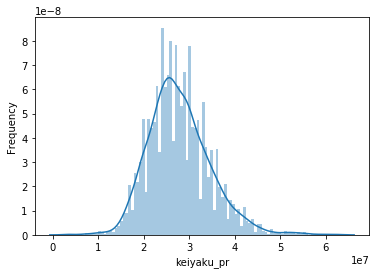

In [18]:
#販売価格のヒストグラム
sns.distplot(tr_goto['keiyaku_pr'],bins=100)
plt.ylabel('Frequency')

In [19]:
#販売価格のヒストグラムの尖度と歪度
print("Skewness: %f" % tr_goto['keiyaku_pr'].skew())
print("Kurtosis: %f" % tr_goto['keiyaku_pr'].kurt())

Skewness: 0.666622
Kurtosis: 1.408705


販売価格のヒストグラムは正規分布に近い形をしていることがわかります。

### 1. 土地の面積と販売価格

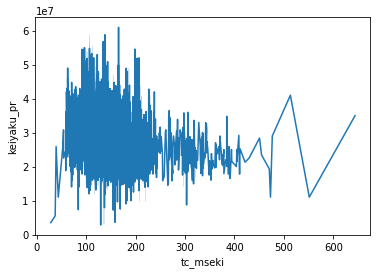

In [12]:
sns.lineplot(x = 'tc_mseki',y = 'keiyaku_pr', data = tr_goto)

綺麗な相関関係は見られませんでした。

### 2. 建物面積と販売価格

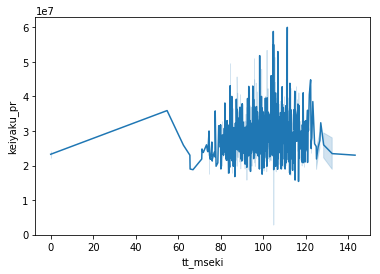

In [13]:
sns.lineplot(x = 'tt_mseki',y = 'keiyaku_pr', data = tr_goto)

こちらも前半はいいですが、後半は相関はなさそうです。

### 3. 幅員と販売価格

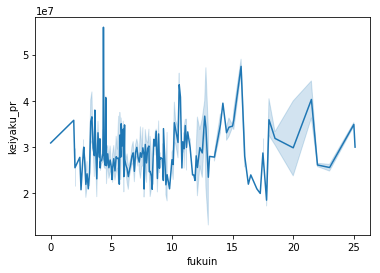

In [21]:
sns.lineplot(x = 'fukuin',y = 'keiyaku_pr', data = tr_goto)

幅員と販売価格も相関はなさそうです。

### 4. 間口と販売価格

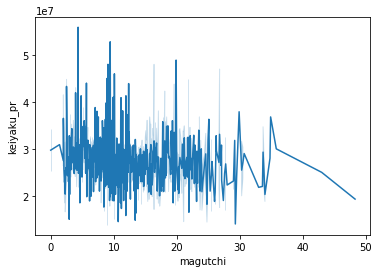

In [22]:
sns.lineplot(x = 'magutchi',y = 'keiyaku_pr', data = tr_goto)

間口と販売価格も相関はなさそうです。。